In [1]:
# Biblioteke za rad sa podacima
import pandas as pd
import numpy as np

# Za grafičke prikaze
import matplotlib.pyplot as plt
import seaborn as sb

# Model: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train/test podela i metričke
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Stil grafika
sb.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


In [4]:
# Učitavanje CSV fajla
data = pd.read_csv('cancer_reg.csv', encoding = 'latin1')

# Prvih 5 redova
display(data.head())

# Informacije o dataset-u
print(data.info())

# Provera NA vrednosti
print('\nBroj NA po koloni:')
print(data.isna().sum())


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
# Uklanjamo sve redove koji nemaju ciljnu promenljivu
target = 'TARGET_deathRate'
data = data.dropna(subset=[target])

# Uklanjamo ostale redove sa NA vrednostima (pošto stablo ne koristi imputacije)
data = data.dropna()

# Prikaz preostalog broja redova
print('Broj redova nakon čišćenja:', len(data))

# Korektno setovanje targeta
y = data[target]


Broj redova nakon čišćenja: 591


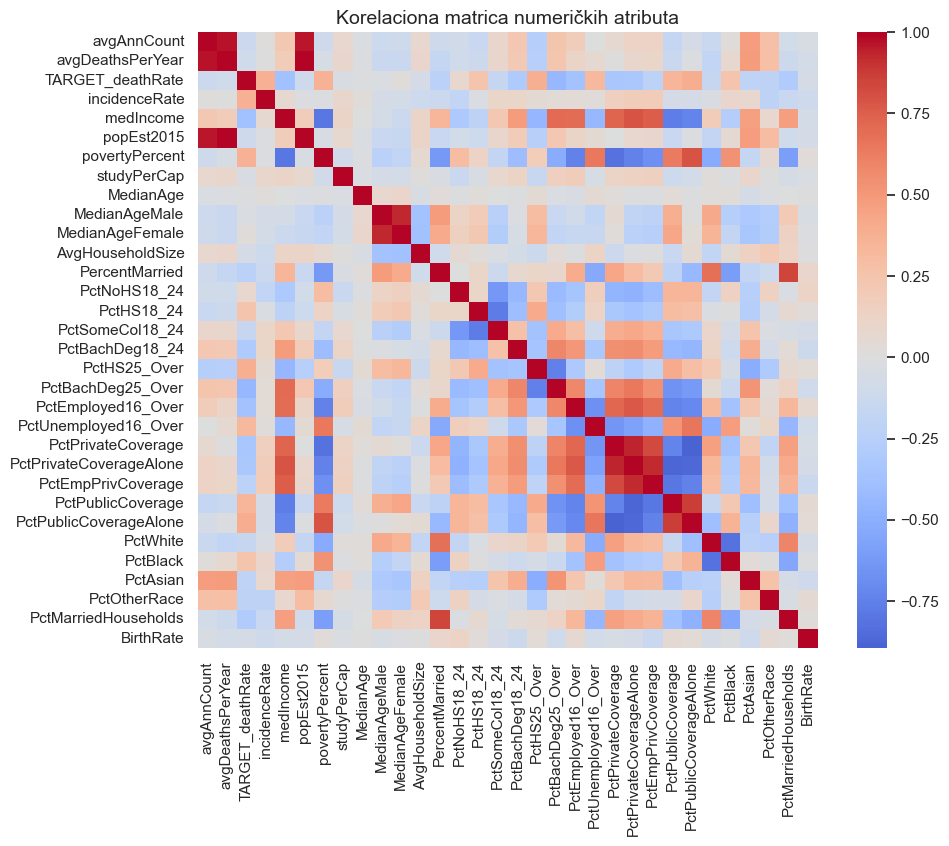


Najveći korelisani atribut: PctBachDeg25_Over


In [10]:
# Korelaciona matrica samo numerickih kolona
corr = data.select_dtypes(include=[np.number]).corr()

# Vizualizacija korelacija
plt.figure(figsize=(10, 8))
sb.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Korelaciona matrica numeričkih atributa')
plt.show()

# Izbor najvece korelacije sa TARGET_deathRate
top_feature = corr[target].drop(target).abs().sort_values(ascending=False).index[0]
print('\nNajveći korelisani atribut:', top_feature)

# X je samo taj jedan atribut
X = data[[top_feature]]


In [11]:
# Podela na train i test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print('Broj redova - train:', len(X_train))
print('Broj redova - test:', len(X_test))

# Komentar:
# - 80% podataka koristimo za treniranje stabla.
# - 20% koristimo za testiranje performansi.


Broj redova - train: 472
Broj redova - test: 119


In [16]:
# Kreiranje i treniranje stabla odlučivanja sa manjim depth-om
tree = DecisionTreeRegressor(max_depth=4, random_state=123)
tree.fit(X_train, y_train)

# Komentar:
# - max_depth ograničava rast stabla → manje overfitovanja i lepša vizualizacija.
# - depth=4 je najčešći izbor za regresiju u primerima.



,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [17]:
# Predikcija
y_pred = tree.predict(X_test)

# Izračunavanje metrika
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('\nMETRIKE ZA MODEL STABLA ODLUČIVANJA:\n')
print(f'MAE  (srednja aps. greška): {mae:.2f}')
print(f'RMSE (koren srednje kv. greške): {rmse:.2f}')
print(f'R²   (koeficijent determinacije): {r2:.3f}')

# Komentar:
# - R² pokazuje koliko dobro stablo objašnjava varijansu podataka.
# - MAE i RMSE izražavaju prosečnu grešku kao broj jedinica u CancerMortality.



METRIKE ZA MODEL STABLA ODLUČIVANJA:

MAE  (srednja aps. greška): 19.44
RMSE (koren srednje kv. greške): 24.63
R²   (koeficijent determinacije): 0.189


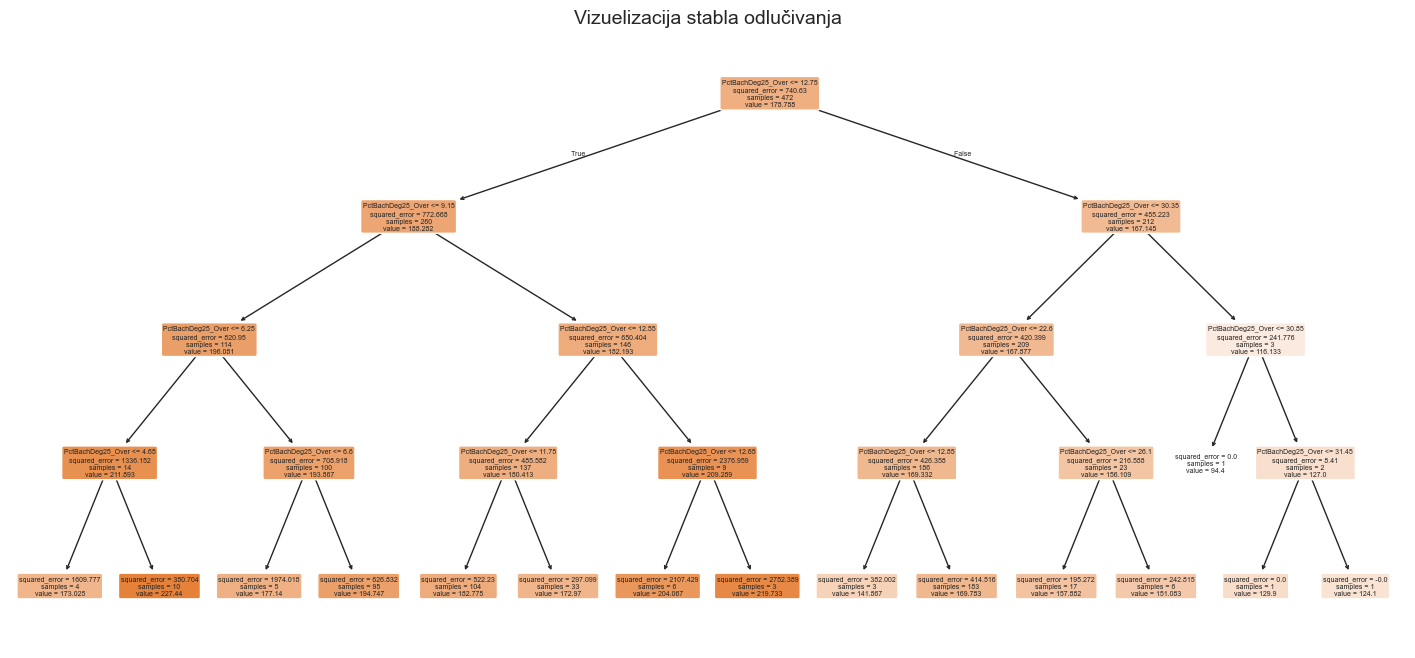

In [18]:
# Crtanje stabla odlučivanja
plt.figure(figsize=(18, 8))
plot_tree(tree, feature_names=[top_feature], filled=True, rounded=True)
plt.title('Vizuelizacija stabla odlučivanja')
plt.show()

# Komentar:
# - Svaki list predstavlja predviđenu vrednost CancerMortality.
# - Dubinе zavise od toga koliko model pravi precizne podele podataka.


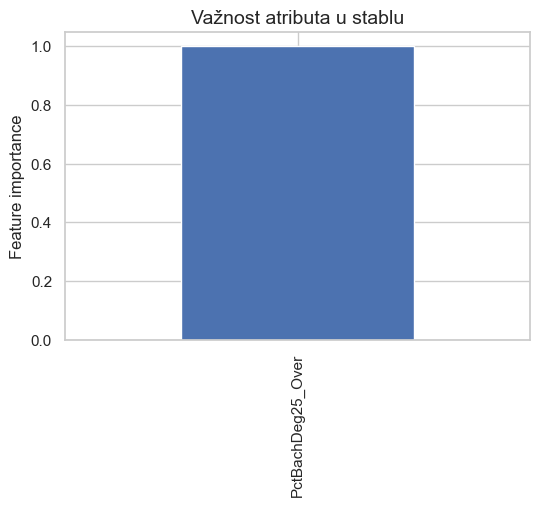

In [19]:
# Važnost atributa (pošto je samo 1, ovo služi kao primer)
importance = pd.Series(tree.feature_importances_, index=[top_feature])

plt.figure(figsize=(6, 4))
importance.plot(kind='bar')
plt.title('Važnost atributa u stablu')
plt.ylabel('Feature importance')
plt.show()
